We will use the pre-trained Keras FaceNet model provided by [Hiroki Taniai](https://github.com/nyoki-mtl) in this tutorial. It was trained on [MS-Celeb-1M dataset](https://www.microsoft.com/en-us/research/project/ms-celeb-1m-challenge-recognizing-one-million-celebrities-real-world/) and expects input images to be color, to have their pixel values whitened (standardized across all three channels), and to have a square shape of 160×160 pixels.

The model can be downloaded from here:

[Keras FaceNet Pre-Trained Model (88 megabytes)](https://drive.google.com/open?id=1pwQ3H4aJ8a6yyJHZkTwtjcL4wYWQb7bn)

Download the model file and place it in your current working directory with the filename ‘facenet_keras.h5‘.

In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
model = tf.keras.models.load_model('facenet_keras.h5')
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [3]:
import cv2
import numpy as np
image_path = 'images/camera1.jpg'
img1 = cv2.imread(image_path, 1)
img = img1[...,::-1]
print(img.shape)
dim = (160, 160)
# resize image
if(img.shape != (160, 160, 3)):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print(img.shape)

x_train = np.array([img])
embedding1 = model.predict(x_train)
print(embedding1)

(720, 1280, 3)
(160, 160, 3)
[[-0.3872075   0.06024833  0.2994993  -0.07941382  1.0743058   0.404186
   0.91245174 -1.070994   -1.1866978  -2.5264208   1.2058841  -2.2213404
  -0.7733623   0.456695   -1.8177005  -1.4141979   1.4536605  -1.9821321
  -0.06448749 -1.1366179   0.7956017  -2.329985    0.15210173  1.5891604
   0.21184002  2.939587    2.0249276  -0.33218184  0.4374066  -1.8140477
   1.2418958   2.588032    0.79466474 -1.0884115  -0.89988256  0.90336263
   2.151918   -0.34743458  1.1654568   0.8626214  -0.15905522  0.42370194
   0.65531063 -0.85884225 -1.655749    3.0175443   0.9130433  -0.06349751
  -0.80113214 -2.5350938   2.8424807   0.8345167   1.321896    0.44960448
   0.869237    4.2909675   0.3828693  -2.1116421   2.006243    1.6539658
  -0.19076324  0.2366132   1.5863404   0.8030283  -0.6814534   0.6084703
   1.9561205   0.12646121  1.7994655   1.7718054   0.05484253  1.2781429
  -1.1966      0.6914058  -1.836299    2.1706371  -1.0885034   0.51255137
  -1.6449667  -2.3

In [4]:
import cv2
import numpy as np
image_path = 'images/Adil.jpg'
img1 = cv2.imread(image_path, 1)
img = img1[...,::-1]
print(img.shape)
dim = (160, 160)
# resize image
if(img.shape != (160, 160, 3)):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print(img.shape)

x_train = np.array([img])
embedding2 = model.predict_on_batch(x_train)
print(embedding2)

(720, 1280, 3)
(160, 160, 3)
[[ 0.49915618  1.2244295   0.2590777  -0.06028593  0.7233558   0.9293543
   1.2471216  -1.641488   -1.5753903  -1.9312638   0.8697308  -2.888384
  -0.30057317  1.2150443  -1.0061605  -1.1230731   0.8173083  -2.5349436
   0.6641268  -2.1024597   0.8043895  -3.401357   -0.09719326  1.7775273
   0.8989056   2.1580985   0.9814489   0.5719085  -0.762584   -2.3712664
   0.5273185   2.7706254  -0.7925359   1.2253623  -0.2622323   0.6998541
   1.7082162  -0.80442536  1.3631454   1.1713356   1.0751566   0.62905675
   0.7635546  -0.7194445  -2.760103    1.7953867   1.6656313   1.4727924
   0.03434574 -2.669518    1.8834145   1.0621183   1.0817814   1.7934508
   0.73050714  4.1021276   0.7277961  -3.0915127   2.157053    2.379944
  -0.95139676  0.35950214  0.87135273  1.0704286   0.18811479 -0.28580052
   1.2622718   0.3901566   1.7108014   2.5306993   0.35776356  1.54666
  -0.6004795   1.4818624  -2.4586685   2.8012683  -0.06359982  0.7599364
  -1.7335579  -2.4946449

In [9]:
dist = np.linalg.norm(embedding1-embedding2)
dist

8.13286

In [11]:
def img_to_encoding(path, model):
    img1 = cv2.imread(path, 1)
    img = img1[...,::-1]
    dim = (160, 160)
      # resize image
    if(img.shape != (160, 160, 3)):
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    x_train = np.array([img])
    embedding2 = model.predict_on_batch(x_train)
    return embedding2

database = {}
database["camera1"] = img_to_encoding("images/camera1.jpg", model)
database["Adil2"] = img_to_encoding("images/Adil2.jpg", model)
database["Adil"] = img_to_encoding("images/Adil.jpg", model)
database["Adil3"] = img_to_encoding("images/Adil3.jpg", model)
database["Adil4"] = img_to_encoding("images/Adil4.jpg", model)

In [18]:
def verify(image_path, identity, database, model):
  
    encoding = img_to_encoding(image_path, model)
    dist = np.linalg.norm(encoding-database[identity])
    print(dist)
    if dist<8:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False
    return dist, door_open

In [43]:
verify("images/sleep.jpg", "Adil3", database, model)
verify("images/Adil4.jpg", "Adil3", database, model)

5.7014155
It's Adil3, welcome in!
6.399812
It's Adil3, welcome in!


(6.399812, True)

In [41]:
def who_is_it(image_path, database, model):
    encoding = img_to_encoding(image_path, model)
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        dist = np.linalg.norm(encoding-db_enc)
        if dist<min_dist:
            min_dist = dist
            identity = name
            print(dist)

    if min_dist > 5:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [42]:
who_is_it("images/sleep.jpg", database, model)

6.667905
6.0943403
5.7014155
Not in the database.


(5.7014155, 'Adil3')

In [49]:
import matplotlib.pyplot as plt
def visualize_conv_layer(layer_name):
    layer_output=model.get_layer(layer_name).output
    
    intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)
    
    intermediate_prediction=intermediate_model.predict(x_train)
    
    row_size=4
    col_size=8
    img_index=0
    
    print(np.shape(intermediate_prediction))
    
    fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))
    
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')
 
    img_index=img_index+1

(1, 77, 77, 64)


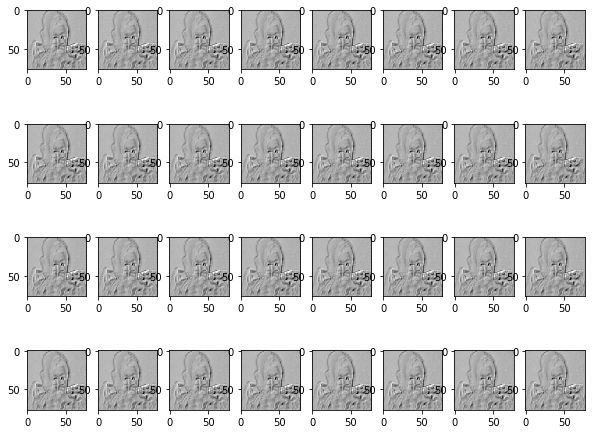

In [50]:
visualize_conv_layer('Conv2d_2b_3x3')
#print(model2.layers[4].output)A